In [566]:
#warmup
#Recursion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import plotly.express as px
import statsmodels.api as sm

In [567]:
def recursion(x):
    
    try:
        if x*2 !=square:
            print(x)
            recursion(x+1)
        else:
            print('It matched with its squared value')
    except RecursionError as e:
        print(e)
        

In [570]:
x=6
square=x**2
recursion(6)

6
7
8
9
10
11
12
13
14
15
16
17
It matched with its squared value


# Time Series
## USDExchangeRate dataset for 5 years from google trends

In [572]:
#loading USDExchangeRate dataset for 5 years from google trends

USD_df=pd.read_csv('USDExchangeRate.csv',parse_dates=['Year'],index_col='Year')
USD_df.head()

,USD Exchange rate
Year,
2016-12-04,100
2016-12-11,92
2016-12-18,87
2016-12-25,71
2017-01-01,78


### Plotting the dataset

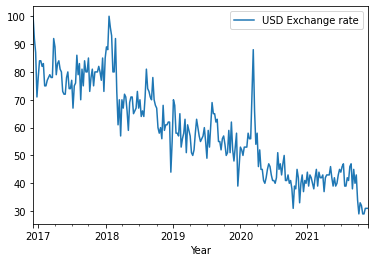

In [573]:
#Ploting the data to check whether our time series is seasonal or non seasonal.
USD_df.plot();

### Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset.

Plot shows USD Exchange Rate. The data does not appear to be a seasonal pattern, since it is not following any regular cycle. There is a slight downward trend appears in our data. But we can detrend it by using differencing or log tranformations. So we will fit a non-seasonal ARIMA model.


### Is it Stationary?

**The data does not depends on time, there is no predictable patterns in the data, so it is not stationary.**


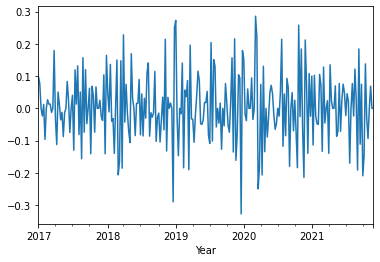

In [555]:
#Now we have to convert our non stationary time series into stationary inorder to apply ARIMA models. We can use 
#differencing or percent change to convert it into stationary.

USD_df['pct_change']=USD_df['USD Exchange rate'].pct_change()
#Dropping Nans
USD_df['pct_change'].dropna().plot();

In [556]:
#We have converted our data into stationary.We are going to plot Autocorrelation and Partial Autocorrelation plots.
USD_df= USD_df.dropna()

### ACF and PACF plot

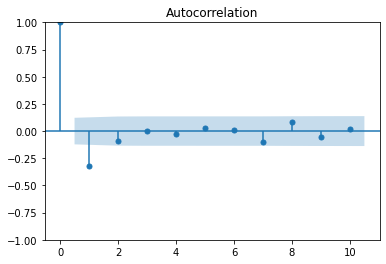

In [557]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(USD_df['pct_change'],lags=10);


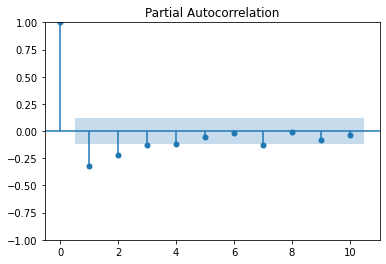

In [558]:
plot_pacf(USD_df['pct_change'],lags=10);

### AR,MA orders from ACF,PACF

plot_acf function used to estimate MA order. From ACF plot, we can see that there is one lag came out from the confidence interval.So our MA order q=1.

plot_pacf function used to estimate AR order. From PACF plot, we can see that there are two lags came out from the confidence interval.So our AR order p=2.

### Implementing ARMA Model

After we have calculated AR order(p),MA order(q),we can fit our ARMA model to the dataframe.

In [559]:
from statsmodels.tsa.arima.model import ARIMA

model= ARIMA(USD_df['pct_change'],order=(2,0,1))

### Fitting the model

In [560]:
fit_model = model.fit()

In [561]:
#summarizing the parameters
fit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             pct_change   No. Observations:                  257
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 245.228
Date:                Fri, 03 Dec 2021   AIC                           -480.457
Time:                        15:31:46   BIC                           -462.711
Sample:                    01-01-2017   HQIC                          -473.320
                         - 11-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0027      0.000     13.590      0.000       0.002       0.003
ar.L1          0.4934      0.055      8.965      0.000       0.386       0.601
ar.L2          0.1357      0.059      2.309      0.021       0.021       0.251
ma.L1         -0.9996      0.406     -2.462      0.014      -1.796      -0.204
sigma2         0.0086      0.003      2.467      0.014       0.002       0.015
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                33.70
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.33   Skew:                             0.09
Prob(H) (two-sided):                  0.18   Kurtosis:                         4.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Certain checks need to be done from the summary**

* ARIMA(2,0,1) model: The coefficients of AR and MA terms is less than 1 ,the sum of the coefficients of the two AR terms is less than one.This seems to be a good model

* AIC(Akaike information criterion) is used to find which model is best. If we have small AIC value, then that is our model.

* BIC(Bayesian information criterion ) is a criterion for model selection among a finite set of models. When comparing the BIC and AIC, penalty for additional parameters is more in BIC than AIC.

* Hannan–Quinn information criterion (HQIC) is an alternative to (AIC) and (BIC).


### Forecasting

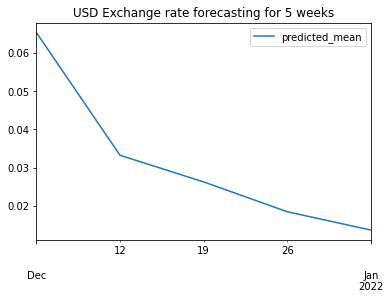

In [562]:
#Using forecast function we can predict USD Exchange Rate for specific period by setting step with our desired value.
forecast_USD = fit_model.forecast(steps=5)
forecast_USD_df = pd.DataFrame(forecast_USD)
forecast_USD_df.plot(title='USD Exchange rate forecasting for 5 weeks');

### Conclusion

* We have downloaded a dataset from google trends and find whether its non seasonal or seasonal. We got a non seasonal time series.
* Then we checked about its stationarity. Our time series was not stationary. So converted it into stationarity by taking percent change.
* To fit into model, we need order parameters. We have calculated AR, MA order parameters from acf and pacf plot.
* Implemented our ARIMA model with (p,q) values.
* Fitted our model, calculated parameters.
* Finally the dataset has been forecasted.


# 2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements

* The Fourier transform is a mathematical function that decomposes a signal, which is a function of time, into the frequencies.The function accepts a time signal as input and produces the frequency representation of the signal as an output. 

* The Fast Fourier Transform (FFT) is an implementation of the DFT which produces almost the same results as the DFT, but  more efficient and much faster which often reduces the computation time significantly. 

### Generating cosine wave

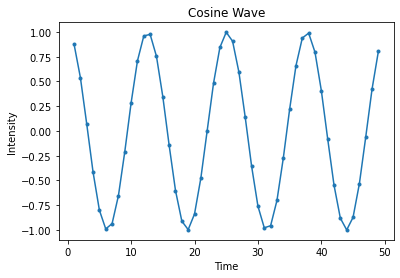

In [563]:
import scipy
from scipy import signal

x = np.arange(1,50,1)
y = np.cos(x/2)

#plotting our input cosine signal

plt.plot(x,y,'.-')
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.title("Cosine Wave")
plt.show()

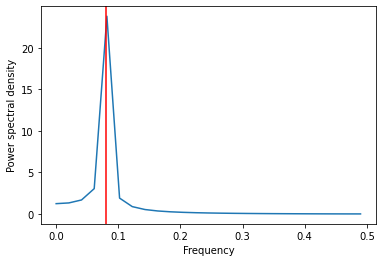

In [564]:
#Calculating fast fourier transform
fft_cos=np.fft.rfft(y)

#power spectral densities (PSD) are used to characterize random vibration signals.The key aspect of a PSD is the amplitude 
#value normalized to the frequency bin width.By normalizing the amplitude we get rid of the dependency so that we 
#can compare vibration levels in signals of different lengths.

#calculating power spectral density
spect_density = np.abs(fft_cos)
frequency = np.fft.rfftfreq(len(y))

#plotting FFt of our input signal
plt.plot(frequency,spect_density)
#Finding peak value 
plt.axvline(1/(4*np.pi),c='r')
plt.xlabel('Frequency')
plt.ylabel('Power spectral density')
plt.show()


# Seasonal Time series

In [ ]:
# I have done an example for SARIMA. Could you please check whether my understanding is correct or not on SARIMA
# and share your thoughts. It will help me to do my homework.

In [171]:
#Seasonal time series has predictable and repeated patterns over time.
#Loading sunscreen datas from google trends

sunscreen_df=pd.read_csv('Sunscreen.csv',parse_dates=['Year'],index_col='Year')
sunscreen_df.head()

,Sunscreen
Year,
2016-12-04,6
2016-12-11,7
2016-12-18,6
2016-12-25,7
2017-01-01,7


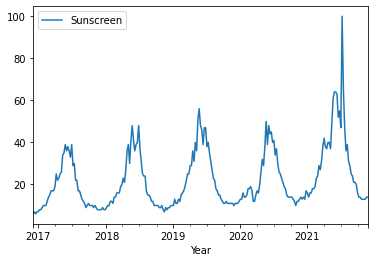

In [174]:
sunscreen_df.plot();

### Decide whether ARMA, ARIMA, or SARIMA makes more sense for the dataset.
The data are clearly with some seasonality, so we will fit SARIMA model

In [296]:
#Our plot follows a strong cycle that every mid of the year it goes high. that means during summer season there is a lot
#search about sunscreen and winter period lesser count.

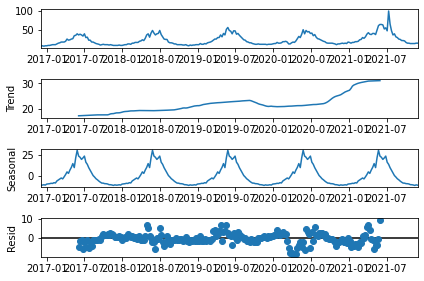

In [317]:
#decomposing the data
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(sunscreen_df)
decomp.plot();

In [318]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

<AxesSubplot:xlabel='Year'>

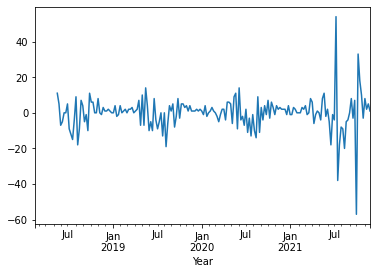

In [383]:
#Taking seasonal differencing and non seasonal differencing, gave window size as 12
sunscreen_df['difference']= sunscreen_df['Sunscreen'].diff().diff(12).dropna()
sunscreen_df['difference'].plot()

In [385]:
sunscreen_df=sunscreen_df.dropna()

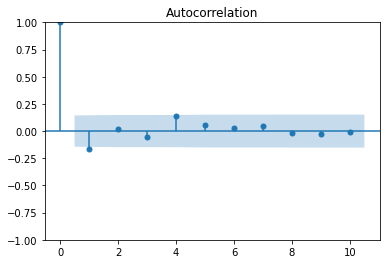

In [386]:
plot_acf(sunscreen_df['difference'],lags=10);

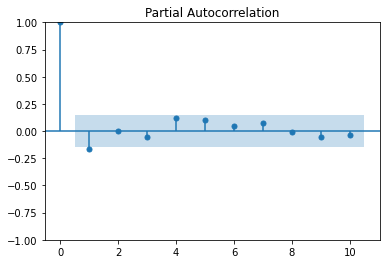

In [387]:
plot_pacf(sunscreen_df['difference'],lags=10);

### Auto SARIMA

In [388]:
# building the model
import pmdarima as pm
model1 = pm.auto_arima(sunscreen_df['difference'],
                      seasonal=True, m=12,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True) 

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=1245.604, Time=0.88 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1356.795, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1274.673, Time=0.17 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1354.837, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=inf, Time=0.94 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=1246.912, Time=2.46 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=inf, Time=3.53 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.43 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=1245.019, Time=2.04 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=1241.847, Time=2.03 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(1,0,2)(1,0,2)[12] intercept   : AIC=1241.008, Time=2.68 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=1242.6

In [409]:
#From the auto arima model, we are selecting our fit model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(difference,order=(1,0,1),seasonal_order=(1,0,2,12))
fit=model.fit()

In [410]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                               Sunscreen   No. Observations:                  261
Model:             SARIMAX(1, 0, 1)x(1, 0, [1, 2], 12)   Log Likelihood                -765.733
Date:                                 Thu, 02 Dec 2021   AIC                           1543.465
Time:                                         21:20:39   BIC                           1564.853
Sample:                                     12-04-2016   HQIC                          1552.062
                                          - 11-28-2021                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8921      0.027     32.755      0.000       0.839       0.945
ma.L1         -0.1862      0.038     -4.966      0.000      -0.260      -0.113
ar.S.L12       0.3341      2.070      0.161      0.872      -3.724       4.392
ma.S.L12      -0.4196      2.063     -0.203      0.839      -4.463       3.624
ma.S.L24      -0.0499      0.418     -0.119      0.905      -0.870       0.770
sigma2        26.6278      0.781     34.086      0.000      25.097      28.159
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8323.03
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

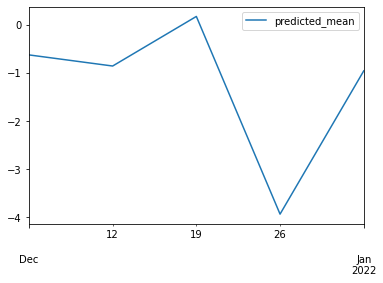

In [402]:

df=pd.DataFrame(fit.forecast(steps=5))
df.plot();